# Prediciting Bike Purchase Behavior using Logistic Regression Model

The aim of this project is to develop a predictive model that accurately idefines the likelihood of a customer
purchasing a bike based on demograhic and socioeconomic characteristics,enabling bike manufacturers and marketers to target their audience more effictively and increase sales

* Variables:

1. Marital Status

2. Age

3. Income

4. ID

5. Children

6. Education

7. Occupation

8. Home Owners

9. Cars

10. Commute Distance

11. Region

12. Gender

13. Purchased Bike (Target Variable)

* Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,root_mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

* Load Data

In [2]:
df= pd.read_csv("Bike_Sales.csv")
df.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


* Descriptive Analysis

In [3]:
df.shape

(1000, 13)

In [4]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [6]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


* Preprocess Data

Dropping any unnecessary columns


In [7]:
df.drop(['ID'],axis=1,inplace=True)

* Exploratory Data Analysis

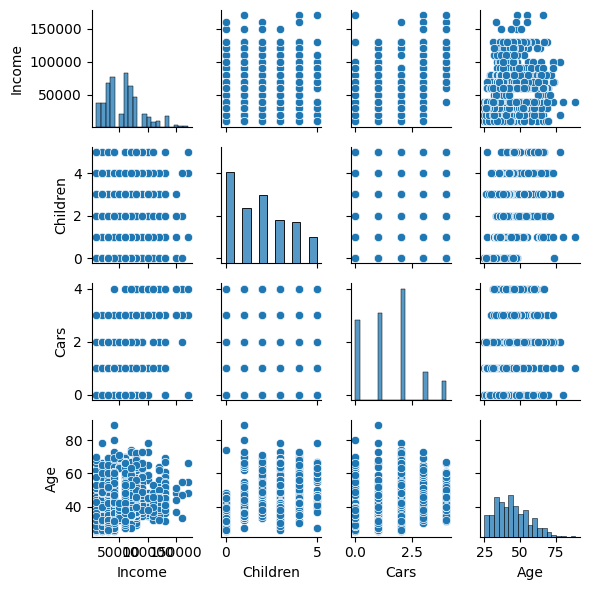

In [8]:
sns.pairplot(df,height=1.5)
plt.tight_layout()

* Converting Categorical Variables to Numerical

In [9]:
Le= LabelEncoder()

In [10]:
df['Education']= Le.fit_transform(df['Education'])
df['Gender']= Le.fit_transform(df['Gender'])
df['Marital Status']= Le.fit_transform(df['Marital Status'])
df['Occupation']= Le.fit_transform(df['Occupation'])
df['Home Owner']= Le.fit_transform(df['Home Owner'])
df['Commute Distance']= Le.fit_transform(df['Commute Distance'])
df['Region']= Le.fit_transform(df['Region'])
df['Purchased Bike']= Le.fit_transform(df['Purchased Bike'])


In [11]:
df.describe()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.462000,0.511000,56360.000000,1.898000,1.631000,2.259000,0.68300,1.442000,1.645000,0.89200,44.163000,0.481000
std,0.498803,0.500129,31085.635215,1.628572,1.353762,1.453283,0.46554,1.125123,1.561862,0.69341,11.364488,0.499889
min,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,25.000000,0.000000
25%,0.000000,0.000000,30000.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.00000,35.000000,0.000000
50%,0.000000,1.000000,60000.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.00000,43.000000,0.000000
75%,1.000000,1.000000,70000.000000,3.000000,3.000000,4.000000,1.00000,2.000000,3.000000,1.00000,52.000000,1.000000
max,1.000000,1.000000,170000.000000,5.000000,4.000000,4.000000,1.00000,4.000000,4.000000,2.00000,89.000000,1.000000


* Collinearity Check

In [12]:
correlation= df.corrwith(df['Purchased Bike'])
print(correlation)

Marital Status      0.111515
Gender             -0.015179
Income              0.049655
Children           -0.119192
Education          -0.141277
Occupation          0.008847
Home Owner         -0.015154
Cars               -0.196845
Commute Distance   -0.075957
Region              0.048943
Age                -0.106497
Purchased Bike      1.000000
dtype: float64


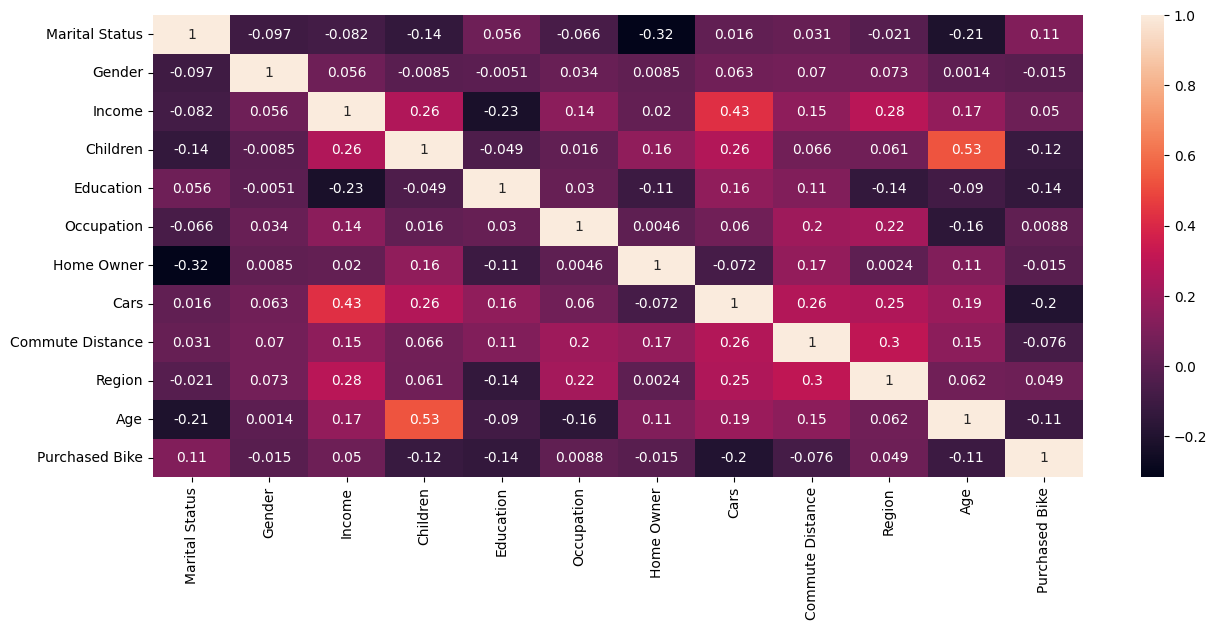

In [22]:
plt.figure(figsize=(15,6))
corr= df.corr()
sns.heatmap(corr,annot=True)
plt.show()

* Scaling Predictors

In [14]:
mx= MinMaxScaler()
df[['Income','Children',
    'Cars','Age','Marital Status',
    'Gender','Education','Occupation',
    'Home Owner','Commute Distance',
    'Region','Age']]= mx.fit_transform(df[['Income','Children',
                      'Cars','Age','Marital Status',
                      'Gender','Education','Occupation',
                     'Home Owner','Commute Distance',
                    'Region','Age']])

Defining Features

In [15]:
mx_x= df[['Income','Commute Distance','Cars',
          'Gender','Education','Region',
          'Occupation']]
mx_y= df['Purchased Bike']

* Splitting Data

In [16]:
mx_x_train,mx_x_test,mx_y_train,mx_y_test= train_test_split(mx_x,mx_y,test_size=0.3,random_state=42)

* Traning Model

In [17]:
m= LogisticRegression()
m.fit(mx_x_train,mx_y_train)

LogisticRegression()

* Making Predictions

In [18]:
prediction= m.predict(mx_x_test)
score= m.score(mx_x_test,mx_y_test)
print(prediction[0])
print(score)

0
0.59


* Model Evaluation

In [19]:
accuracy= accuracy_score(mx_y_test,prediction)
print("Accuracy:",accuracy)
mse= mean_squared_error(mx_y_test,prediction)
rmse= np.sqrt(mse)
cm= confusion_matrix(mx_y_test,prediction)
cr= classification_report(mx_y_test,prediction)
print("Mean Squared Error:",mse)
print("Root mean square error:",rmse)
print("confusion_matrix:",cm)
#print("classification_report:",cr)

Accuracy: 0.59
Mean Squared Error: 0.41
Root mean square error: 0.6403124237432849
confusion_matrix: [[101  47]
 [ 76  76]]


* Deploying Model

Using Trained Model to work on new data

In [20]:
new_entry= pd.DataFrame({'Income':[60000],'Commute Distance':[0.5],'Cars':[1],
          'Gender':[1],'Education':[0.75],'Region':[1],
          'Occupation':[0.75]})
New_output= m.predict(new_entry)
print("Predicted Probability of Bike Purchase:",New_output)

Predicted Probability of Bike Purchase: [1]


Project done by: Jones Osele

email: oselejones@gmail.com